# Problem Statement

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 1. Time of purchase patterns (making sure last-minute purchases are expensive) 2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

# Data Collection Phase

You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

# Data Loading and Data Analysis

In [3]:
#read  all csv file first
flight1=pd.read_csv(r"E:\Data Science\Flight price\flight1.csv")
flight2=pd.read_csv(r"E:\Data Science\Flight price\flight2.csv")
flight3=pd.read_csv(r"E:\Data Science\Flight price\flight3.csv")
flight4=pd.read_csv(r"E:\Data Science\Flight price\flight4.csv")
flight5=pd.read_csv(r"E:\Data Science\Flight price\flight5.csv")
flight6=pd.read_csv(r"E:\Data Science\Flight price\flight6.csv")
flight7=pd.read_csv(r"E:\Data Science\Flight price\flight7.csv")
flight8=pd.read_csv(r"E:\Data Science\Flight price\flight8.csv")
flight9=pd.read_csv(r"E:\Data Science\Flight price\flight9.csv")
flight10=pd.read_csv(r"E:\Data Science\Flight price\flight10.csv")
flight11=pd.read_csv(r"E:\Data Science\Flight price\flight11.csv")
flight12=pd.read_csv(r"E:\Data Science\Flight price\flight12.csv")
flight13=pd.read_csv(r"E:\Data Science\Flight price\flight13.csv")
flight14=pd.read_csv(r"E:\Data Science\Flight price\flight14.csv")
flight15=pd.read_csv(r"E:\Data Science\Flight price\flight15.csv")
flight16=pd.read_csv(r"E:\Data Science\Flight price\flight16.csv")
flight17=pd.read_csv(r"E:\Data Science\Flight price\flight17.csv")

# Add all csv file into one file

In [4]:
flight=pd.concat([flight1,flight2,flight3,flight4,flight5,flight6,flight7,flight8,flight9,flight10,flight11,flight12,flight13,flight14,flight15,flight16,flight17],axis=0)
flight.head()

Unnamed: 0 Airline Name     Source Destination Departure Time  \
0           0     Go First  New Delhi      Mumbai          09:00   
1           1     Go First  New Delhi      Mumbai          09:10   
2           2     Go First  New Delhi      Mumbai          05:25   
3           3     SpiceJet  New Delhi      Mumbai          19:00   
4           4     Air Asia  New Delhi      Mumbai          08:20   

     Arrival Time Total stops Total Duration   Fare        Date  
0           15:45      1 Stop         6h 45m  4,941  23/11/2021  
1           16:15      1 Stop         7h 05m  4,941  23/11/2021  
2           14:05      1 Stop         8h 40m  4,941  23/11/2021  
3  10:35\n+ 1 day      1 Stop        15h 35m  5,401  23/11/2021  
4           14:10      1 Stop         5h 50m  5,953  23/11/2021

In [5]:
# saving as a CSV file
flight.to_csv("E:\\Data Science\\Flight price\\flight.csv")

In [6]:
flight.shape

(1613, 10)

In [7]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 0 to 122
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1613 non-null   int64 
 1   Airline Name    1613 non-null   object
 2   Source          1613 non-null   object
 3   Destination     1613 non-null   object
 4   Departure Time  1613 non-null   object
 5   Arrival Time    1613 non-null   object
 6   Total stops     1613 non-null   object
 7   Total Duration  1613 non-null   object
 8   Fare            1613 non-null   object
 9   Date            1613 non-null   object
dtypes: int64(1), object(9)
memory usage: 138.6+ KB


In [8]:
flight=flight.drop(columns=['Unnamed: 0'],axis=1)
flight.tail()

Airline Name   Source Destination Departure Time Arrival Time Total stops  \
118      Vistara  Kolkata      Mumbai          10:15        18:20   2 Stop(s)   
119      Vistara  Kolkata      Mumbai          07:10        18:20   2 Stop(s)   
120      Vistara  Kolkata      Mumbai          10:15        20:15   2 Stop(s)   
121      Vistara  Kolkata      Mumbai          10:15        20:45   2 Stop(s)   
122      Vistara  Kolkata      Mumbai          10:15        21:35   2 Stop(s)   

    Total Duration    Fare        Date  
118         8h 05m  16,547  03/12/2021  
119        11h 10m  16,547  03/12/2021  
120        10h 00m  16,578  03/12/2021  
121        10h 30m  16,578  03/12/2021  
122        11h 20m  16,674  03/12/2021

In [9]:
# resetting the DataFrame index
#flight= flight.reset_index()

In [10]:
flight.tail()

Airline Name   Source Destination Departure Time Arrival Time Total stops  \
118      Vistara  Kolkata      Mumbai          10:15        18:20   2 Stop(s)   
119      Vistara  Kolkata      Mumbai          07:10        18:20   2 Stop(s)   
120      Vistara  Kolkata      Mumbai          10:15        20:15   2 Stop(s)   
121      Vistara  Kolkata      Mumbai          10:15        20:45   2 Stop(s)   
122      Vistara  Kolkata      Mumbai          10:15        21:35   2 Stop(s)   

    Total Duration    Fare        Date  
118         8h 05m  16,547  03/12/2021  
119        11h 10m  16,547  03/12/2021  
120        10h 00m  16,578  03/12/2021  
121        10h 30m  16,578  03/12/2021  
122        11h 20m  16,674  03/12/2021

In [11]:
# shuffle the DataFrame rows
flight = flight.sample(frac = 1)

In [12]:
flight.head()

Airline Name     Source Destination Departure Time    Arrival Time  \
108    Air India  New Delhi     Kolkata          21:15  08:20\n+ 1 day   
8       Go First  Bangalore      Mumbai          06:30           12:30   
60     Air India     Jaipur   Bangalore          14:00  11:10\n+ 1 day   
100      Vistara    Lucknow      Mumbai          10:05           18:20   
57       Vistara    Kolkata   Hyderabad          10:25  07:50\n+ 1 day   

    Total stops Total Duration    Fare        Date  
108      1 Stop        11h 05m  15,195  27/11/2021  
8        1 Stop         6h 00m   5,177  26/11/2021  
60       1 Stop        21h 10m  11,096  24/11/2021  
100   2 Stop(s)         8h 15m  14,708  25/11/2021  
57       1 Stop        21h 25m  12,032  26/11/2021

In [13]:
flight.tail()

Airline Name     Source Destination Departure Time Arrival Time  \
106      Vistara    Kolkata   Hyderabad          10:25        19:55   
103       IndiGo  New Delhi      Mumbai          13:50        19:50   
37       Vistara    Lucknow      Mumbai          15:25        20:05   
1       SpiceJet  Bangalore        Pune          09:10        10:35   
35      SpiceJet    Kolkata     Chennai          15:55        18:25   

    Total stops Total Duration    Fare        Date  
106   2 Stop(s)         9h 30m  23,289  26/11/2021  
103      1 Stop         6h 00m  10,260  23/11/2021  
37       1 Stop         4h 40m   9,484  25/11/2021  
1      Non Stop         1h 25m   5,177  30/11/2021  
35     Non Stop         2h 30m   6,804  01/12/2021

In [14]:
# resetting the DataFrame index
flight= flight.reset_index()

In [15]:
flight=flight.drop(columns=['index'],axis=1)

In [16]:
flight.tail()

Airline Name     Source Destination Departure Time Arrival Time  \
1608      Vistara    Kolkata   Hyderabad          10:25        19:55   
1609       IndiGo  New Delhi      Mumbai          13:50        19:50   
1610      Vistara    Lucknow      Mumbai          15:25        20:05   
1611     SpiceJet  Bangalore        Pune          09:10        10:35   
1612     SpiceJet    Kolkata     Chennai          15:55        18:25   

     Total stops Total Duration    Fare        Date  
1608   2 Stop(s)         9h 30m  23,289  26/11/2021  
1609      1 Stop         6h 00m  10,260  23/11/2021  
1610      1 Stop         4h 40m   9,484  25/11/2021  
1611    Non Stop         1h 25m   5,177  30/11/2021  
1612    Non Stop         2h 30m   6,804  01/12/2021

In [17]:
flight.shape

(1613, 9)

In [18]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline Name    1613 non-null   object
 1   Source          1613 non-null   object
 2   Destination     1613 non-null   object
 3   Departure Time  1613 non-null   object
 4   Arrival Time    1613 non-null   object
 5   Total stops     1613 non-null   object
 6   Total Duration  1613 non-null   object
 7   Fare            1613 non-null   object
 8   Date            1613 non-null   object
dtypes: object(9)
memory usage: 113.5+ KB


In [19]:
flight.head()

Airline Name     Source Destination Departure Time    Arrival Time  \
0    Air India  New Delhi     Kolkata          21:15  08:20\n+ 1 day   
1     Go First  Bangalore      Mumbai          06:30           12:30   
2    Air India     Jaipur   Bangalore          14:00  11:10\n+ 1 day   
3      Vistara    Lucknow      Mumbai          10:05           18:20   
4      Vistara    Kolkata   Hyderabad          10:25  07:50\n+ 1 day   

  Total stops Total Duration    Fare        Date  
0      1 Stop        11h 05m  15,195  27/11/2021  
1      1 Stop         6h 00m   5,177  26/11/2021  
2      1 Stop        21h 10m  11,096  24/11/2021  
3   2 Stop(s)         8h 15m  14,708  25/11/2021  
4      1 Stop        21h 25m  12,032  26/11/2021

# Univaraiate Analysis

In [20]:
flight['Airline Name'].value_counts()

IndiGo       467
Vistara      443
Air India    380
Go First     138
Air Asia     124
SpiceJet      61
Name: Airline Name, dtype: int64

In [21]:
flight['Airline Name'].nunique()

6

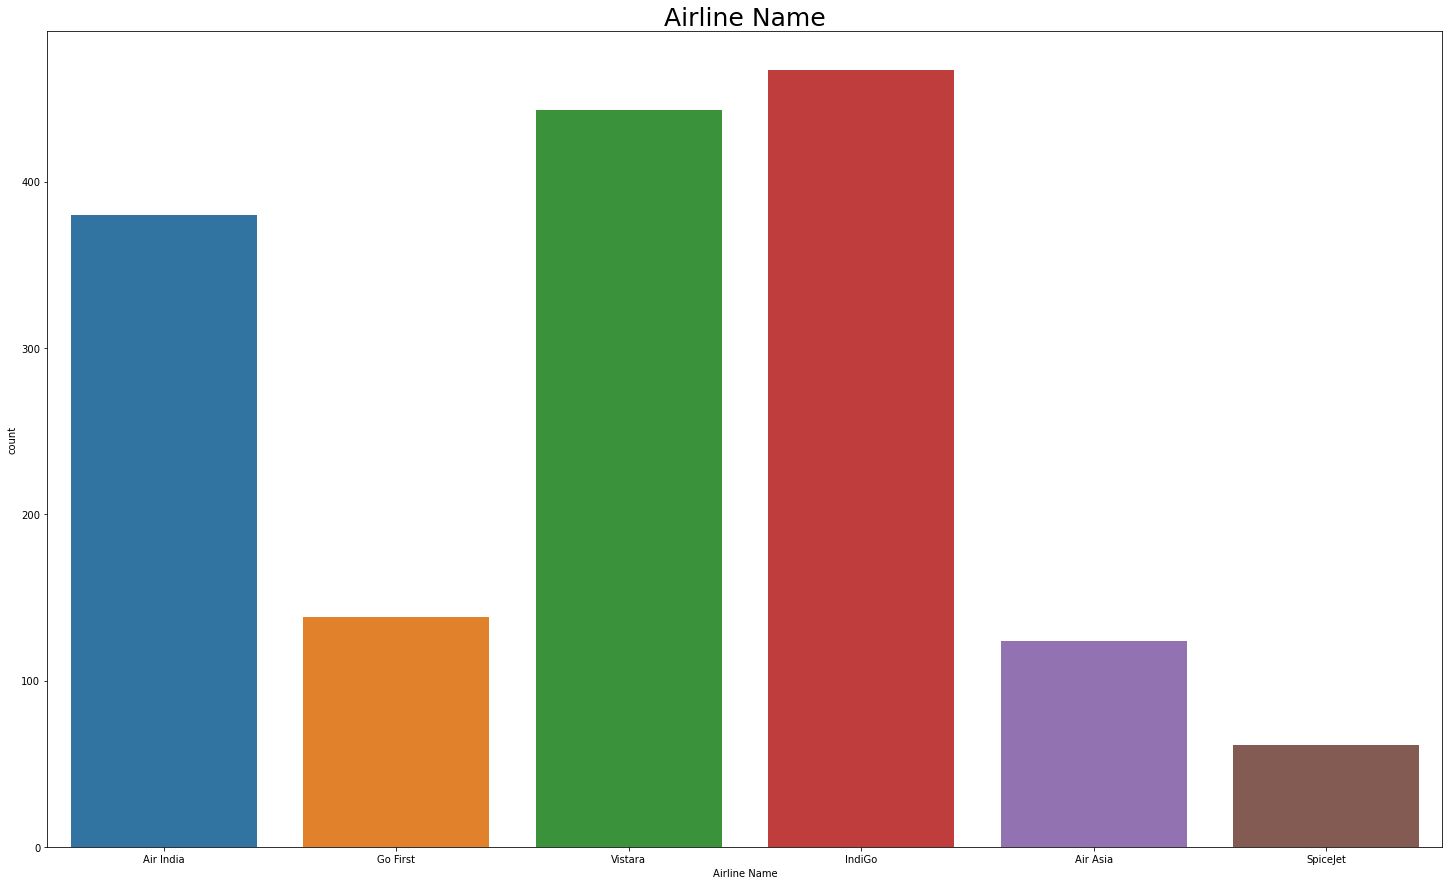

In [22]:
plt.figure(figsize=(25,15))
sns.countplot(flight['Airline Name'])
plt.title('Airline Name',fontsize=25)
plt.show()

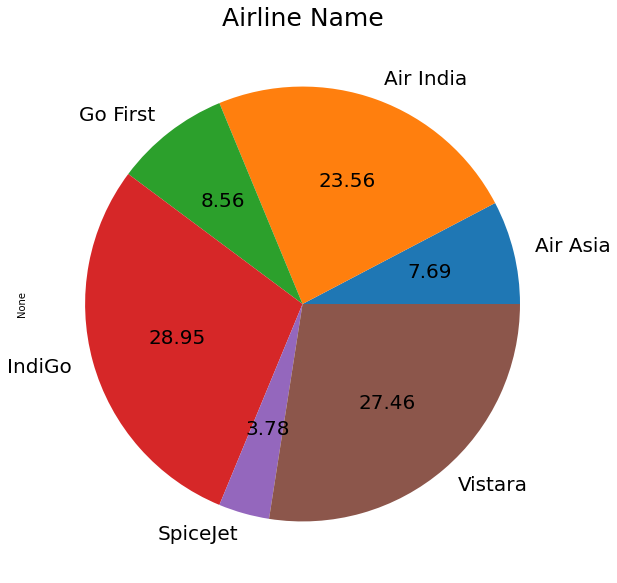

In [23]:
plt.figure(figsize=(15,10))
flight.groupby('Airline Name').size().plot(kind='pie', autopct='%.2f',fontsize=20)
plt.title('Airline Name',fontsize=25)
plt.show()

In [24]:
flight['Source'].value_counts()

New Delhi    438
Kolkata      338
Bangalore    234
Chennai      230
Jaipur       108
Lucknow      108
Goa           57
Mumbai        55
Hyderabad     45
Name: Source, dtype: int64

In [25]:
flight['Source'].nunique()

9

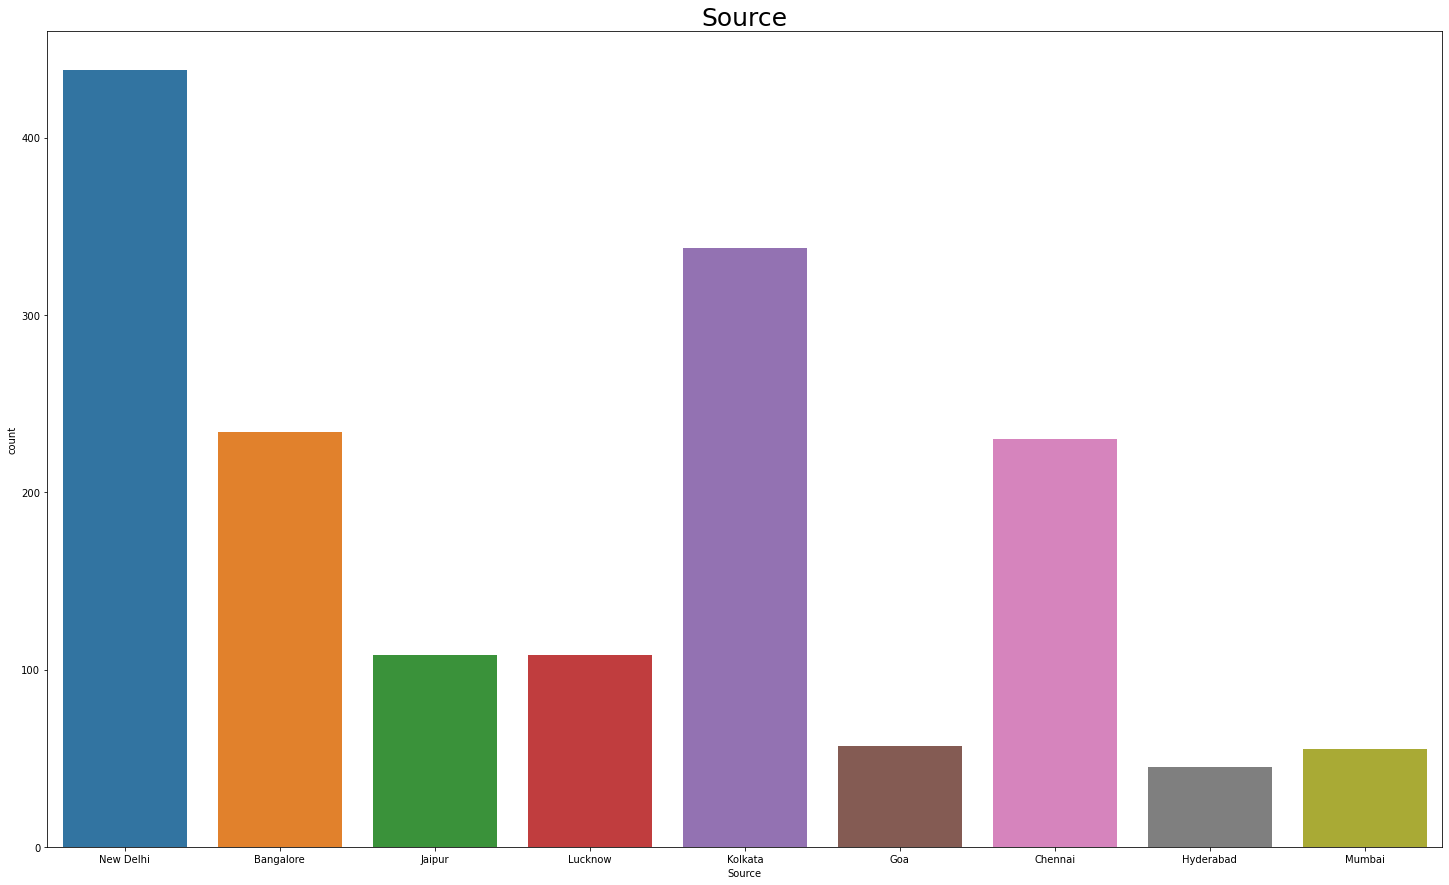

In [26]:
plt.figure(figsize=(25,15))
sns.countplot(flight['Source'])
plt.title('Source',fontsize=25)
plt.show()

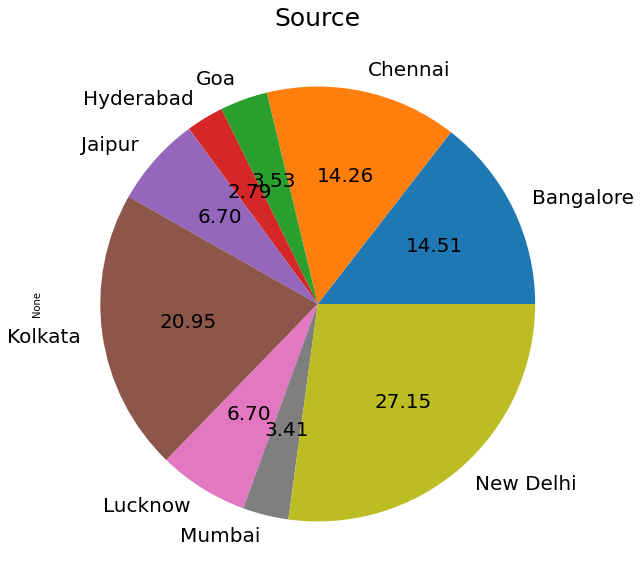

In [27]:
plt.figure(figsize=(15,10))
flight.groupby('Source').size().plot(kind='pie', autopct='%.2f',fontsize=20)
plt.title('Source',fontsize=25)
plt.show()

In [28]:
flight['Destination'].value_counts()

Mumbai       694
Hyderabad    256
Chennai      249
Pune         146
Kolkata      135
Bangalore    133
Name: Destination, dtype: int64

In [29]:
flight['Destination'].nunique()

6

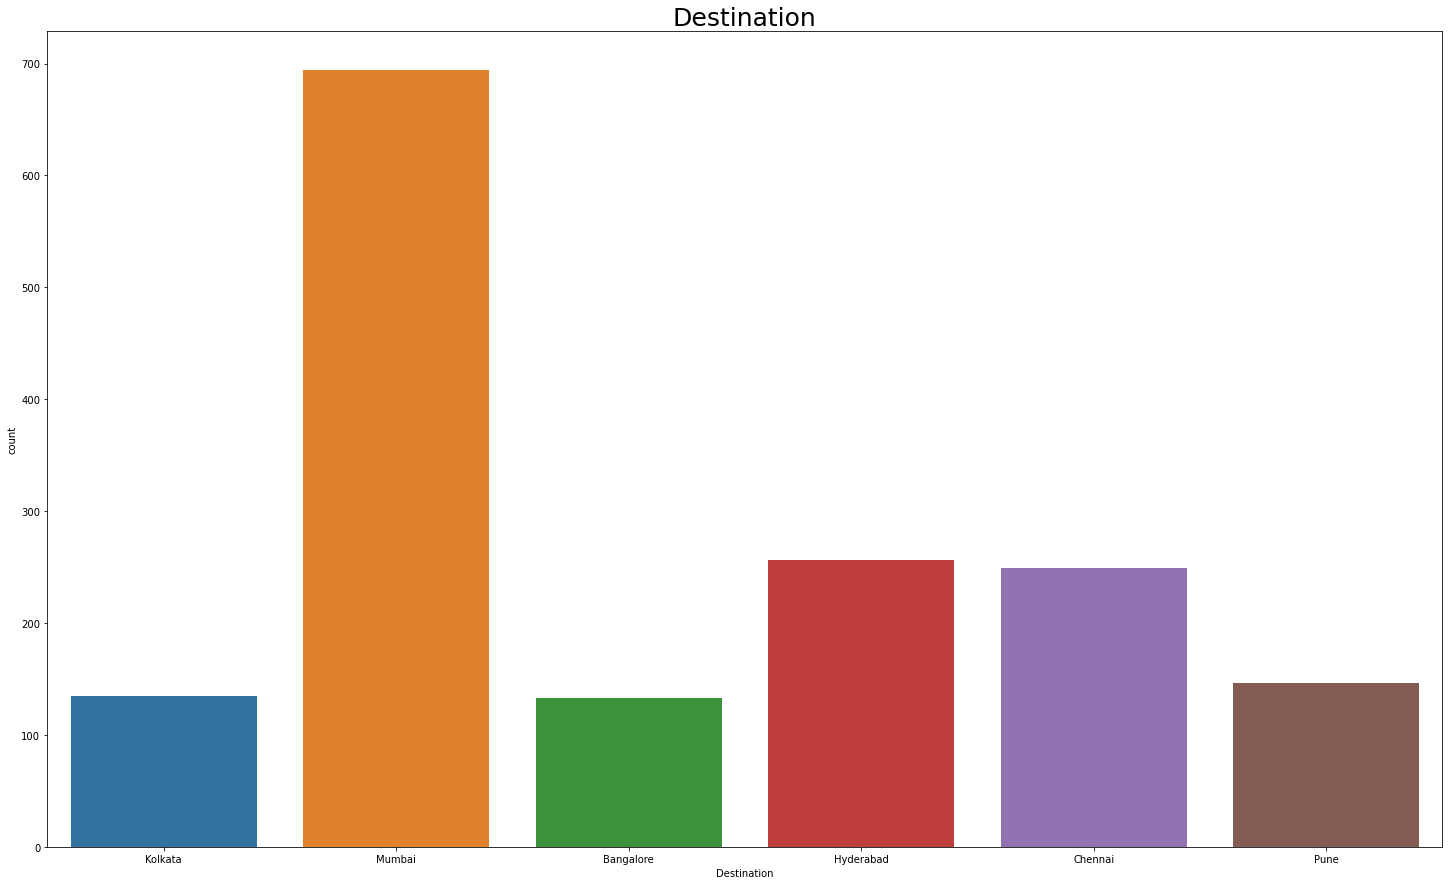

In [30]:
plt.figure(figsize=(25,15))
sns.countplot(flight['Destination'])
plt.title('Destination',fontsize=25)
plt.show()

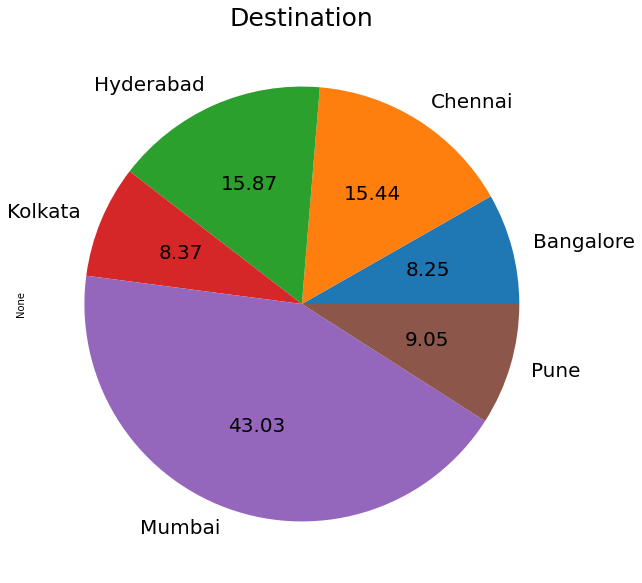

In [31]:
plt.figure(figsize=(15,10))
flight.groupby('Destination').size().plot(kind='pie', autopct='%.2f',fontsize=20)
plt.title('Destination',fontsize=25)
plt.show()

In [32]:
flight['Total stops'].value_counts()

1 Stop       1057
2 Stop(s)     277
Non Stop      250
3 Stop(s)      29
Name: Total stops, dtype: int64

In [33]:
flight['Total stops'].nunique()

4

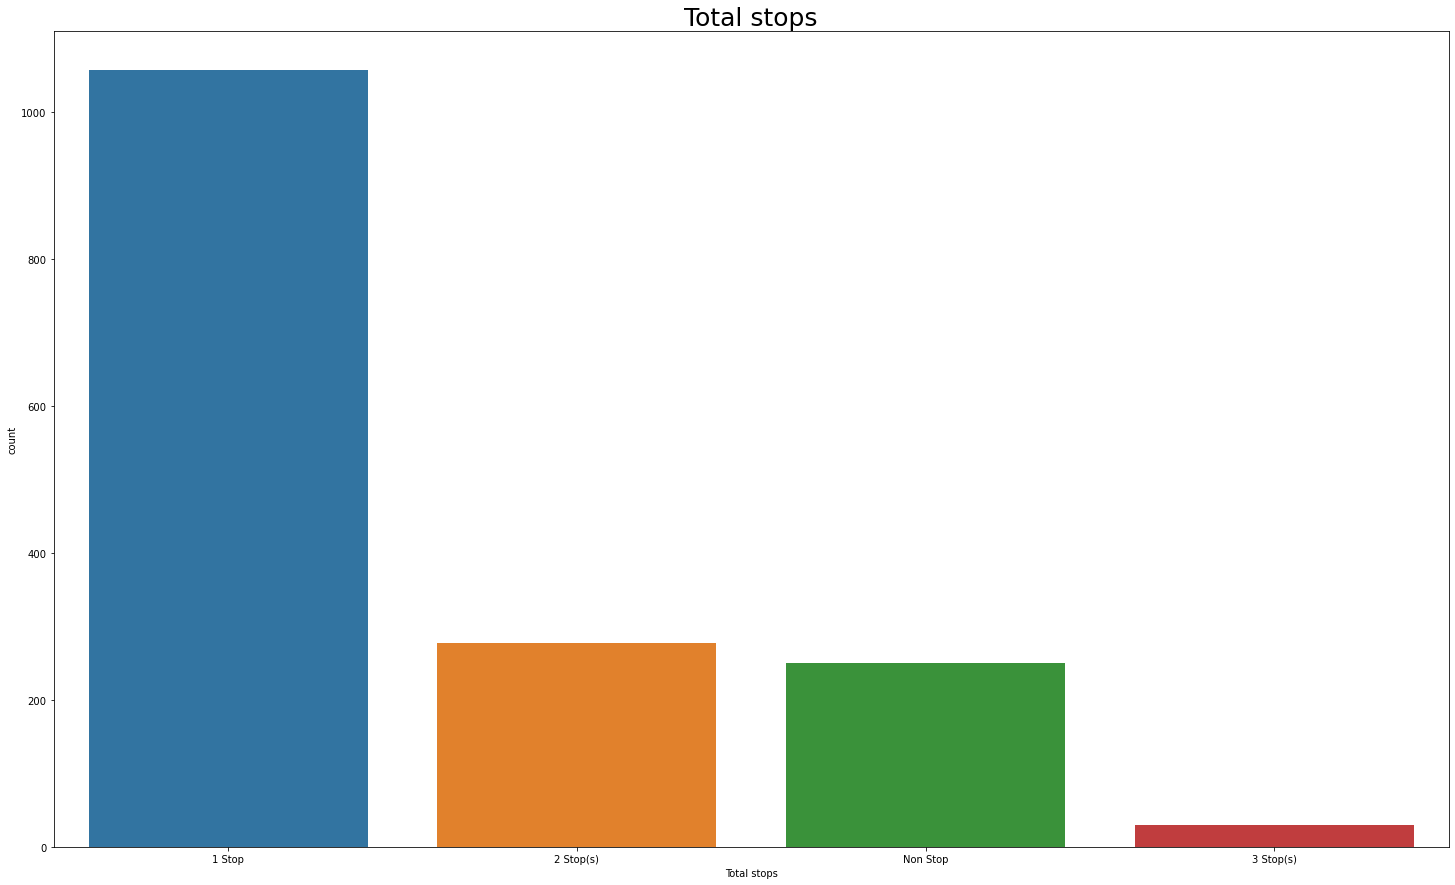

In [34]:
plt.figure(figsize=(25,15))
sns.countplot(flight['Total stops'])
plt.title('Total stops',fontsize=25)
plt.show()

In [35]:
plt.figure(figsize=(15,10))
flight.groupby('Total stops').size().plot(kind='pie', autopct='%.2f',fontsize=20)
plt.title('Total stops',fontsize=25)
plt.show()

In [36]:
flight['Date'].value_counts()

26/11/2021    388
27/11/2021    276
23/11/2021    256
01/12/2021    163
24/11/2021    140
03/12/2021    123
30/11/2021    114
25/11/2021    108
28/11/2021     45
Name: Date, dtype: int64

In [37]:
flight['Date'].nunique()

9

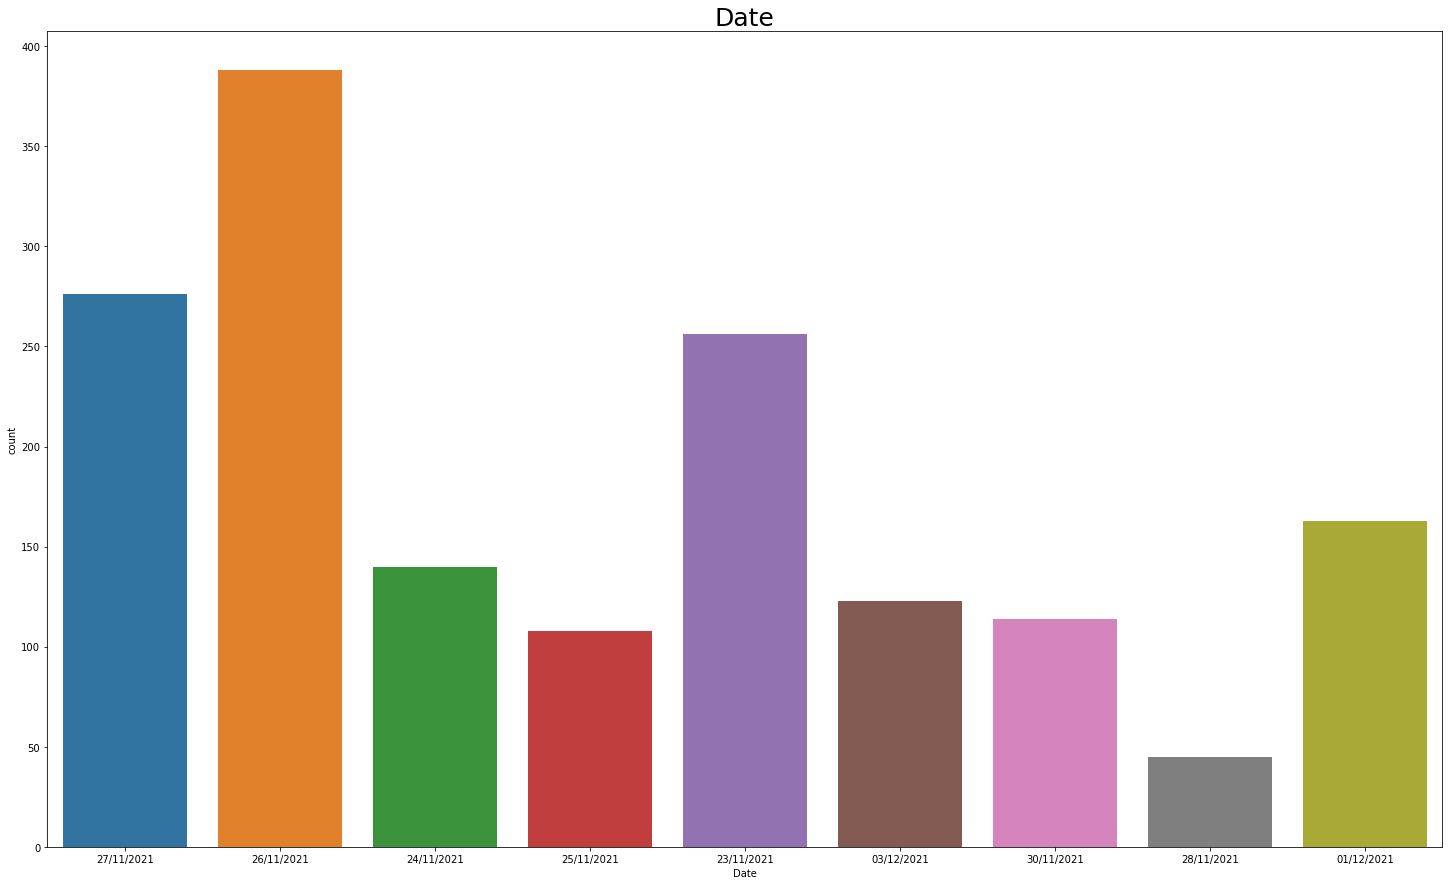

In [38]:
plt.figure(figsize=(25,15))
sns.countplot(flight['Date'])
plt.title('Date',fontsize=25)
plt.show()

In [39]:
plt.figure(figsize=(15,10))
flight.groupby('Date').size().plot(kind='pie', autopct='%.2f',fontsize=20)
plt.title('Date',fontsize=25)
plt.show()

In [40]:
flight.head()

Airline Name     Source Destination Departure Time    Arrival Time  \
0    Air India  New Delhi     Kolkata          21:15  08:20\n+ 1 day   
1     Go First  Bangalore      Mumbai          06:30           12:30   
2    Air India     Jaipur   Bangalore          14:00  11:10\n+ 1 day   
3      Vistara    Lucknow      Mumbai          10:05           18:20   
4      Vistara    Kolkata   Hyderabad          10:25  07:50\n+ 1 day   

  Total stops Total Duration    Fare        Date  
0      1 Stop        11h 05m  15,195  27/11/2021  
1      1 Stop         6h 00m   5,177  26/11/2021  
2      1 Stop        21h 10m  11,096  24/11/2021  
3   2 Stop(s)         8h 15m  14,708  25/11/2021  
4      1 Stop        21h 25m  12,032  26/11/2021

In [41]:
flight['Fare'][0]

'15,195'

In [42]:
flight['Fare'] = pd.to_numeric(flight['Fare'].str.replace(",", ""), errors='coerce')

In [43]:
flight.tail()

Airline Name     Source Destination Departure Time Arrival Time  \
1608      Vistara    Kolkata   Hyderabad          10:25        19:55   
1609       IndiGo  New Delhi      Mumbai          13:50        19:50   
1610      Vistara    Lucknow      Mumbai          15:25        20:05   
1611     SpiceJet  Bangalore        Pune          09:10        10:35   
1612     SpiceJet    Kolkata     Chennai          15:55        18:25   

     Total stops Total Duration   Fare        Date  
1608   2 Stop(s)         9h 30m  23289  26/11/2021  
1609      1 Stop         6h 00m  10260  23/11/2021  
1610      1 Stop         4h 40m   9484  25/11/2021  
1611    Non Stop         1h 25m   5177  30/11/2021  
1612    Non Stop         2h 30m   6804  01/12/2021

In [44]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline Name    1613 non-null   object
 1   Source          1613 non-null   object
 2   Destination     1613 non-null   object
 3   Departure Time  1613 non-null   object
 4   Arrival Time    1613 non-null   object
 5   Total stops     1613 non-null   object
 6   Total Duration  1613 non-null   object
 7   Fare            1613 non-null   int64 
 8   Date            1613 non-null   object
dtypes: int64(1), object(8)
memory usage: 113.5+ KB


In [45]:
flight.tail()

Airline Name     Source Destination Departure Time Arrival Time  \
1608      Vistara    Kolkata   Hyderabad          10:25        19:55   
1609       IndiGo  New Delhi      Mumbai          13:50        19:50   
1610      Vistara    Lucknow      Mumbai          15:25        20:05   
1611     SpiceJet  Bangalore        Pune          09:10        10:35   
1612     SpiceJet    Kolkata     Chennai          15:55        18:25   

     Total stops Total Duration   Fare        Date  
1608   2 Stop(s)         9h 30m  23289  26/11/2021  
1609      1 Stop         6h 00m  10260  23/11/2021  
1610      1 Stop         4h 40m   9484  25/11/2021  
1611    Non Stop         1h 25m   5177  30/11/2021  
1612    Non Stop         2h 30m   6804  01/12/2021

In [46]:
flight['Date']=pd.to_datetime(flight['Date'], infer_datetime_format=True)  

In [47]:
flight.tail()

Airline Name     Source Destination Departure Time Arrival Time  \
1608      Vistara    Kolkata   Hyderabad          10:25        19:55   
1609       IndiGo  New Delhi      Mumbai          13:50        19:50   
1610      Vistara    Lucknow      Mumbai          15:25        20:05   
1611     SpiceJet  Bangalore        Pune          09:10        10:35   
1612     SpiceJet    Kolkata     Chennai          15:55        18:25   

     Total stops Total Duration   Fare       Date  
1608   2 Stop(s)         9h 30m  23289 2021-11-26  
1609      1 Stop         6h 00m  10260 2021-11-23  
1610      1 Stop         4h 40m   9484 2021-11-25  
1611    Non Stop         1h 25m   5177 2021-11-30  
1612    Non Stop         2h 30m   6804 2021-12-01

In [48]:
flight['date'] = pd.DatetimeIndex(flight['Date']).day
flight['year'] = pd.DatetimeIndex(flight['Date']).year
flight['month'] = pd.DatetimeIndex(flight['Date']).month

In [49]:
flight.tail()

Airline Name     Source Destination Departure Time Arrival Time  \
1608      Vistara    Kolkata   Hyderabad          10:25        19:55   
1609       IndiGo  New Delhi      Mumbai          13:50        19:50   
1610      Vistara    Lucknow      Mumbai          15:25        20:05   
1611     SpiceJet  Bangalore        Pune          09:10        10:35   
1612     SpiceJet    Kolkata     Chennai          15:55        18:25   

     Total stops Total Duration   Fare       Date  date  year  month  
1608   2 Stop(s)         9h 30m  23289 2021-11-26    26  2021     11  
1609      1 Stop         6h 00m  10260 2021-11-23    23  2021     11  
1610      1 Stop         4h 40m   9484 2021-11-25    25  2021     11  
1611    Non Stop         1h 25m   5177 2021-11-30    30  2021     11  
1612    Non Stop         2h 30m   6804 2021-12-01     1  2021     12

In [50]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Airline Name    1613 non-null   object        
 1   Source          1613 non-null   object        
 2   Destination     1613 non-null   object        
 3   Departure Time  1613 non-null   object        
 4   Arrival Time    1613 non-null   object        
 5   Total stops     1613 non-null   object        
 6   Total Duration  1613 non-null   object        
 7   Fare            1613 non-null   int64         
 8   Date            1613 non-null   datetime64[ns]
 9   date            1613 non-null   int64         
 10  year            1613 non-null   int64         
 11  month           1613 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 151.3+ KB


In [51]:
flight=flight.drop(columns=['Date'],axis=1)

In [52]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline Name    1613 non-null   object
 1   Source          1613 non-null   object
 2   Destination     1613 non-null   object
 3   Departure Time  1613 non-null   object
 4   Arrival Time    1613 non-null   object
 5   Total stops     1613 non-null   object
 6   Total Duration  1613 non-null   object
 7   Fare            1613 non-null   int64 
 8   date            1613 non-null   int64 
 9   year            1613 non-null   int64 
 10  month           1613 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 138.7+ KB


In [53]:
flight['Dep_hour']= pd.DatetimeIndex(flight['Departure Time']).hour
flight['Dep_minute']= pd.DatetimeIndex(flight['Departure Time']).minute

In [54]:
flight.head()

Airline Name     Source Destination Departure Time    Arrival Time  \
0    Air India  New Delhi     Kolkata          21:15  08:20\n+ 1 day   
1     Go First  Bangalore      Mumbai          06:30           12:30   
2    Air India     Jaipur   Bangalore          14:00  11:10\n+ 1 day   
3      Vistara    Lucknow      Mumbai          10:05           18:20   
4      Vistara    Kolkata   Hyderabad          10:25  07:50\n+ 1 day   

  Total stops Total Duration   Fare  date  year  month  Dep_hour  Dep_minute  
0      1 Stop        11h 05m  15195    27  2021     11        21          15  
1      1 Stop         6h 00m   5177    26  2021     11         6          30  
2      1 Stop        21h 10m  11096    24  2021     11        14           0  
3   2 Stop(s)         8h 15m  14708    25  2021     11        10           5  
4      1 Stop        21h 25m  12032    26  2021     11        10          25

In [55]:
flight=flight.drop(columns=['Departure Time'],axis=1)

In [56]:
flight.rename(columns = {'Arrival Time':'Arrival_time'}, inplace = True)

In [57]:
flight.head()

Airline Name     Source Destination    Arrival_time Total stops  \
0    Air India  New Delhi     Kolkata  08:20\n+ 1 day      1 Stop   
1     Go First  Bangalore      Mumbai           12:30      1 Stop   
2    Air India     Jaipur   Bangalore  11:10\n+ 1 day      1 Stop   
3      Vistara    Lucknow      Mumbai           18:20   2 Stop(s)   
4      Vistara    Kolkata   Hyderabad  07:50\n+ 1 day      1 Stop   

  Total Duration   Fare  date  year  month  Dep_hour  Dep_minute  
0        11h 05m  15195    27  2021     11        21          15  
1         6h 00m   5177    26  2021     11         6          30  
2        21h 10m  11096    24  2021     11        14           0  
3         8h 15m  14708    25  2021     11        10           5  
4        21h 25m  12032    26  2021     11        10          25

In [58]:
flight['Arrival_time']=flight['Arrival_time'].replace('\n+ 1 day','')

In [59]:
flight.head()

Airline Name     Source Destination    Arrival_time Total stops  \
0    Air India  New Delhi     Kolkata  08:20\n+ 1 day      1 Stop   
1     Go First  Bangalore      Mumbai           12:30      1 Stop   
2    Air India     Jaipur   Bangalore  11:10\n+ 1 day      1 Stop   
3      Vistara    Lucknow      Mumbai           18:20   2 Stop(s)   
4      Vistara    Kolkata   Hyderabad  07:50\n+ 1 day      1 Stop   

  Total Duration   Fare  date  year  month  Dep_hour  Dep_minute  
0        11h 05m  15195    27  2021     11        21          15  
1         6h 00m   5177    26  2021     11         6          30  
2        21h 10m  11096    24  2021     11        14           0  
3         8h 15m  14708    25  2021     11        10           5  
4        21h 25m  12032    26  2021     11        10          25

In [60]:
hour=flight['Total Duration'].str.extract('(d+)h',expand=False).astype(float)*60
minutes=flight['Total Duration'].str.extract('(d+)m',expand=False).astype(float)
flight['Total Duration(minutes)'] = (pd.to_timedelta(flight['Total Duration']).dt.seconds // 60).astype(int) 

In [61]:
flight.head()

Airline Name     Source Destination    Arrival_time Total stops  \
0    Air India  New Delhi     Kolkata  08:20\n+ 1 day      1 Stop   
1     Go First  Bangalore      Mumbai           12:30      1 Stop   
2    Air India     Jaipur   Bangalore  11:10\n+ 1 day      1 Stop   
3      Vistara    Lucknow      Mumbai           18:20   2 Stop(s)   
4      Vistara    Kolkata   Hyderabad  07:50\n+ 1 day      1 Stop   

  Total Duration   Fare  date  year  month  Dep_hour  Dep_minute  \
0        11h 05m  15195    27  2021     11        21          15   
1         6h 00m   5177    26  2021     11         6          30   
2        21h 10m  11096    24  2021     11        14           0   
3         8h 15m  14708    25  2021     11        10           5   
4        21h 25m  12032    26  2021     11        10          25   

   Total Duration(minutes)  
0                      665  
1                      360  
2                     1270  
3                      495  
4                     1285

In [62]:
flight=flight.drop(columns=['Total Duration'],axis=1)

In [63]:
flight.head()

Airline Name     Source Destination    Arrival_time Total stops   Fare  \
0    Air India  New Delhi     Kolkata  08:20\n+ 1 day      1 Stop  15195   
1     Go First  Bangalore      Mumbai           12:30      1 Stop   5177   
2    Air India     Jaipur   Bangalore  11:10\n+ 1 day      1 Stop  11096   
3      Vistara    Lucknow      Mumbai           18:20   2 Stop(s)  14708   
4      Vistara    Kolkata   Hyderabad  07:50\n+ 1 day      1 Stop  12032   

   date  year  month  Dep_hour  Dep_minute  Total Duration(minutes)  
0    27  2021     11        21          15                      665  
1    26  2021     11         6          30                      360  
2    24  2021     11        14           0                     1270  
3    25  2021     11        10           5                      495  
4    26  2021     11        10          25                     1285

In [64]:
flight['Total stops'].value_counts()

1 Stop       1057
2 Stop(s)     277
Non Stop      250
3 Stop(s)      29
Name: Total stops, dtype: int64

In [65]:
flight['Total stops']=flight['Total stops'].replace(['Non Stop','1 Stop','2 Stop(s)','3 Stop(s)'],[0,1,2,3])

In [66]:
flight.head()

Airline Name     Source Destination    Arrival_time  Total stops   Fare  \
0    Air India  New Delhi     Kolkata  08:20\n+ 1 day            1  15195   
1     Go First  Bangalore      Mumbai           12:30            1   5177   
2    Air India     Jaipur   Bangalore  11:10\n+ 1 day            1  11096   
3      Vistara    Lucknow      Mumbai           18:20            2  14708   
4      Vistara    Kolkata   Hyderabad  07:50\n+ 1 day            1  12032   

   date  year  month  Dep_hour  Dep_minute  Total Duration(minutes)  
0    27  2021     11        21          15                      665  
1    26  2021     11         6          30                      360  
2    24  2021     11        14           0                     1270  
3    25  2021     11        10           5                      495  
4    26  2021     11        10          25                     1285

In [67]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airline Name             1613 non-null   object
 1   Source                   1613 non-null   object
 2   Destination              1613 non-null   object
 3   Arrival_time             1613 non-null   object
 4   Total stops              1613 non-null   int64 
 5   Fare                     1613 non-null   int64 
 6   date                     1613 non-null   int64 
 7   year                     1613 non-null   int64 
 8   month                    1613 non-null   int64 
 9   Dep_hour                 1613 non-null   int64 
 10  Dep_minute               1613 non-null   int64 
 11  Total Duration(minutes)  1613 non-null   int32 
dtypes: int32(1), int64(7), object(4)
memory usage: 145.0+ KB


In [68]:
flight['arr_hour'],flight['arr_day']=flight['Arrival_time'].str.split('\n',2).str

In [69]:
flight.head()

Airline Name     Source Destination    Arrival_time  Total stops   Fare  \
0    Air India  New Delhi     Kolkata  08:20\n+ 1 day            1  15195   
1     Go First  Bangalore      Mumbai           12:30            1   5177   
2    Air India     Jaipur   Bangalore  11:10\n+ 1 day            1  11096   
3      Vistara    Lucknow      Mumbai           18:20            2  14708   
4      Vistara    Kolkata   Hyderabad  07:50\n+ 1 day            1  12032   

   date  year  month  Dep_hour  Dep_minute  Total Duration(minutes) arr_hour  \
0    27  2021     11        21          15                      665    08:20   
1    26  2021     11         6          30                      360    12:30   
2    24  2021     11        14           0                     1270    11:10   
3    25  2021     11        10           5                      495    18:20   
4    26  2021     11        10          25                     1285    07:50   

   arr_day  
0  + 1 day  
1      NaN  
2  + 1 day  
3      NaN  
4  + 1 day

In [70]:
flight=flight.drop(columns=['arr_day','Arrival_time'],axis=1)

In [71]:
flight.head()

Airline Name     Source Destination  Total stops   Fare  date  year  month  \
0    Air India  New Delhi     Kolkata            1  15195    27  2021     11   
1     Go First  Bangalore      Mumbai            1   5177    26  2021     11   
2    Air India     Jaipur   Bangalore            1  11096    24  2021     11   
3      Vistara    Lucknow      Mumbai            2  14708    25  2021     11   
4      Vistara    Kolkata   Hyderabad            1  12032    26  2021     11   

   Dep_hour  Dep_minute  Total Duration(minutes) arr_hour  
0        21          15                      665    08:20  
1         6          30                      360    12:30  
2        14           0                     1270    11:10  
3        10           5                      495    18:20  
4        10          25                     1285    07:50

In [72]:
flight['Arrival_hour']= pd.DatetimeIndex(flight['arr_hour']).hour
flight['Arrival_minute']= pd.DatetimeIndex(flight['arr_hour']).minute

In [73]:
flight.head()

Airline Name     Source Destination  Total stops   Fare  date  year  month  \
0    Air India  New Delhi     Kolkata            1  15195    27  2021     11   
1     Go First  Bangalore      Mumbai            1   5177    26  2021     11   
2    Air India     Jaipur   Bangalore            1  11096    24  2021     11   
3      Vistara    Lucknow      Mumbai            2  14708    25  2021     11   
4      Vistara    Kolkata   Hyderabad            1  12032    26  2021     11   

   Dep_hour  Dep_minute  Total Duration(minutes) arr_hour  Arrival_hour  \
0        21          15                      665    08:20             8   
1         6          30                      360    12:30            12   
2        14           0                     1270    11:10            11   
3        10           5                      495    18:20            18   
4        10          25                     1285    07:50             7   

   Arrival_minute  
0              20  
1              30  
2              10  
3              20  
4              50

In [74]:
flight=flight.drop(columns=['arr_hour'],axis=1)

In [75]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airline Name             1613 non-null   object
 1   Source                   1613 non-null   object
 2   Destination              1613 non-null   object
 3   Total stops              1613 non-null   int64 
 4   Fare                     1613 non-null   int64 
 5   date                     1613 non-null   int64 
 6   year                     1613 non-null   int64 
 7   month                    1613 non-null   int64 
 8   Dep_hour                 1613 non-null   int64 
 9   Dep_minute               1613 non-null   int64 
 10  Total Duration(minutes)  1613 non-null   int32 
 11  Arrival_hour             1613 non-null   int64 
 12  Arrival_minute           1613 non-null   int64 
dtypes: int32(1), int64(9), object(3)
memory usage: 157.6+ KB


# Bivariate Analysis

In [76]:
sns.catplot(x='Airline Name',y="Fare",data=flight.sort_values("Fare",ascending=False),kind="violin",height=5,aspect=3)

In [77]:
sns.catplot(x='Source',y="Fare",data=flight.sort_values("Fare",ascending=False),kind="violin",height=5,aspect=3)

In [78]:
sns.catplot(x='Destination',y="Fare",data=flight.sort_values("Fare",ascending=False),kind="violin",height=5,aspect=3)

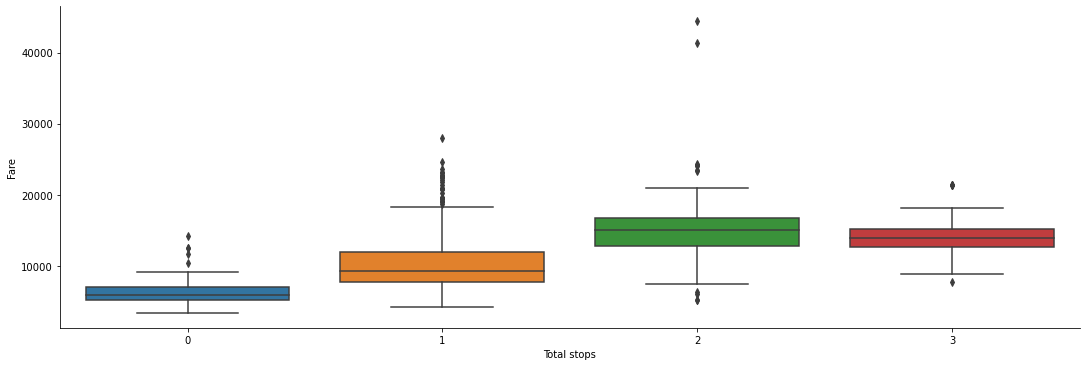

In [79]:
sns.catplot(x='Total stops',y="Fare",data=flight.sort_values("Fare",ascending=False),kind="box",height=5,aspect=3)

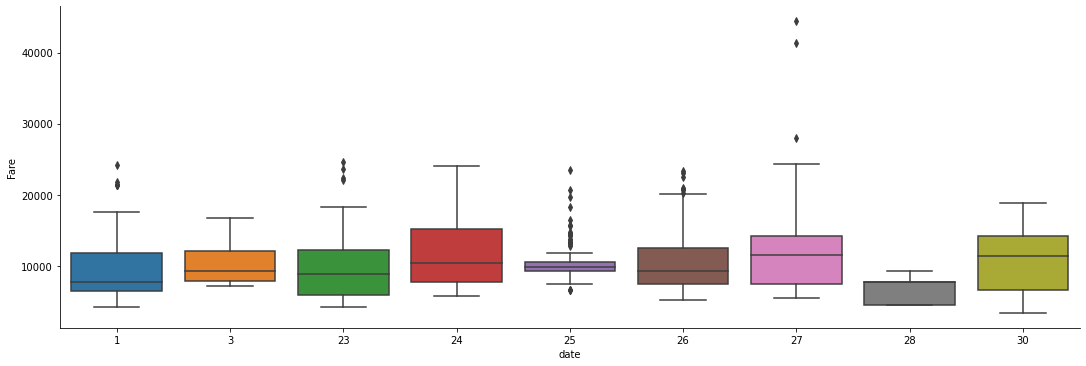

In [80]:
sns.catplot(x='date',y="Fare",data=flight.sort_values("Fare",ascending=False),kind="box",height=5,aspect=3)

# Bivariate Analysis for COntinous data

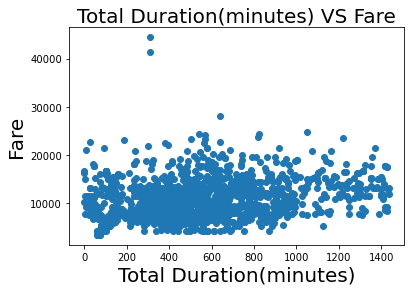

In [81]:
plt.scatter(flight['Total Duration(minutes)'],flight['Fare'])
plt.xlabel('Total Duration(minutes)',fontsize=20)
plt.ylabel('Fare',fontsize=20)
plt.title('Total Duration(minutes) VS Fare', fontsize=20)
plt.show()

# Univariate Analysis for Continous feature

<AxesSubplot:xlabel='Total Duration(minutes)', ylabel='Density'>

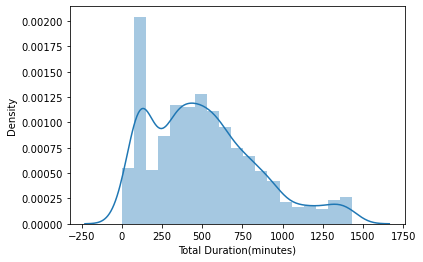

In [82]:
sns.distplot(flight['Total Duration(minutes)'])

<AxesSubplot:xlabel='Total Duration(minutes)'>

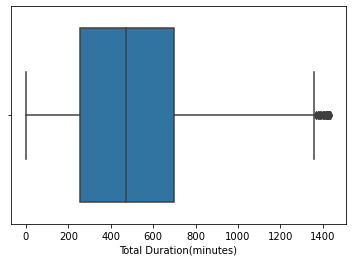

In [83]:
sns.boxplot(flight['Total Duration(minutes)'])

In [84]:
flight['Total Duration(minutes)'].skew()

0.7249654093430471

In [85]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
flight['Total Duration(minutes)']=scaler.fit_transform(flight[['Total Duration(minutes)']].values)

In [86]:
flight['Total Duration(minutes)'].skew()

-0.09178873106343177

In [87]:
sns.distplot(flight['Total Duration(minutes)'])

<AxesSubplot:xlabel='Total Duration(minutes)', ylabel='Density'>

<AxesSubplot:xlabel='Total Duration(minutes)'>

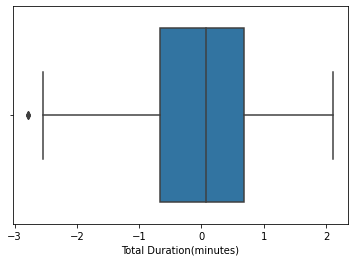

In [88]:
sns.boxplot(flight['Total Duration(minutes)'])

In [89]:
flight.head()

Airline Name     Source Destination  Total stops   Fare  date  year  month  \
0    Air India  New Delhi     Kolkata            1  15195    27  2021     11   
1     Go First  Bangalore      Mumbai            1   5177    26  2021     11   
2    Air India     Jaipur   Bangalore            1  11096    24  2021     11   
3      Vistara    Lucknow      Mumbai            2  14708    25  2021     11   
4      Vistara    Kolkata   Hyderabad            1  12032    26  2021     11   

   Dep_hour  Dep_minute  Total Duration(minutes)  Arrival_hour  Arrival_minute  
0        21          15                 0.600302             8              20  
1         6          30                -0.272637            12              30  
2        14           0                 1.830873            11              10  
3        10           5                 0.149547            18              20  
4        10          25                 1.856764             7              50

In [90]:
flight_num=flight.drop(columns=['Airline Name','Source','Destination','Total stops','Fare','date','year','month','Dep_hour','Dep_minute','Arrival_hour','Arrival_minute'],axis=1)
flight_cat=flight.drop(columns=['Total Duration(minutes)'],axis=1)

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(flight_num)

In [92]:
flight_num1=pd.DataFrame(x_scaled,columns = flight_num.columns)# here converted array into dataframe
flight_num1.head()

Total Duration(minutes)
0                 0.691621
1                 0.512976
2                 0.943455
3                 0.599375
4                 0.948754

In [93]:
# here we will use concate method to combine both dataframe

In [94]:
flight_new=pd.concat([flight_cat,flight_num1],axis=1)

In [95]:
flight_new.head()

Airline Name     Source Destination  Total stops   Fare  date  year  month  \
0    Air India  New Delhi     Kolkata            1  15195    27  2021     11   
1     Go First  Bangalore      Mumbai            1   5177    26  2021     11   
2    Air India     Jaipur   Bangalore            1  11096    24  2021     11   
3      Vistara    Lucknow      Mumbai            2  14708    25  2021     11   
4      Vistara    Kolkata   Hyderabad            1  12032    26  2021     11   

   Dep_hour  Dep_minute  Arrival_hour  Arrival_minute  Total Duration(minutes)  
0        21          15             8              20                 0.691621  
1         6          30            12              30                 0.512976  
2        14           0            11              10                 0.943455  
3        10           5            18              20                 0.599375  
4        10          25             7              50                 0.948754

# Encoding

In [96]:

# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
#Encode labels in column 'Airline Name'.
flight_new['Airline Name']= label_encoder.fit_transform(flight_new['Airline Name'])
flight_new['Source']= label_encoder.fit_transform(flight_new['Source'])
flight_new['Destination']= label_encoder.fit_transform(flight_new['Destination'])

In [97]:
flight_new.head()

Airline Name  Source  Destination  Total stops   Fare  date  year  month  \
0             1       8            3            1  15195    27  2021     11   
1             2       0            4            1   5177    26  2021     11   
2             1       4            0            1  11096    24  2021     11   
3             5       6            4            2  14708    25  2021     11   
4             5       5            2            1  12032    26  2021     11   

   Dep_hour  Dep_minute  Arrival_hour  Arrival_minute  Total Duration(minutes)  
0        21          15             8              20                 0.691621  
1         6          30            12              30                 0.512976  
2        14           0            11              10                 0.943455  
3        10           5            18              20                 0.599375  
4        10          25             7              50                 0.948754

In [98]:
flight_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Airline Name             1613 non-null   int32  
 1   Source                   1613 non-null   int32  
 2   Destination              1613 non-null   int32  
 3   Total stops              1613 non-null   int64  
 4   Fare                     1613 non-null   int64  
 5   date                     1613 non-null   int64  
 6   year                     1613 non-null   int64  
 7   month                    1613 non-null   int64  
 8   Dep_hour                 1613 non-null   int64  
 9   Dep_minute               1613 non-null   int64  
 10  Arrival_hour             1613 non-null   int64  
 11  Arrival_minute           1613 non-null   int64  
 12  Total Duration(minutes)  1613 non-null   float64
dtypes: float64(1), int32(3), int64(9)
memory usage: 145.0 KB


In [99]:
x=flight_new.drop(columns=['Fare'],axis=1)
y=flight_new['Fare']

In [100]:
x.shape

(1613, 12)

In [101]:
y.shape

(1613,)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [103]:
# finding best random state
from sklearn.tree import DecisionTreeRegressor
maxr2=0  # initially max r2 is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    r2=r2_score(y_test,pred) # genrate r2 score by comparing test label and predicted label
    if r2> maxr2:
        maxr2=r2 # assign r2 score to max r2
        MaxRs=i  # the number at which we get max r2 is treated as random state
print('Best r2 is',maxr2,"on Random state",MaxRs)

Best r2 is 0.683447799335029 on Random state 156


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

# Feature Selection

In [105]:
from sklearn.feature_selection import VarianceThreshold
var_thresh=VarianceThreshold(threshold=0)
var_thresh.fit(x_train)

VarianceThreshold(threshold=0)

In [106]:
# finding the non_constant features
len(x_train.columns[var_thresh.get_support()])

11

In [107]:
constant_columns=[column for column in x_train.columns if column not in x_train.columns[var_thresh.get_support()]]
print(len(constant_columns))

1


In [108]:
for column in constant_columns:
    print(column)

year


In [109]:
# here we dropped column "Year"

# ANOVA Test

In [110]:
x_train=x_train.drop(constant_columns,axis=1)
x_test=x_test.drop(constant_columns,axis=1)

In [111]:
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,y_train)

In [112]:
f_p_values

(array([ 998.45022741, 2339.78185567,  913.96448222,  412.16997333,
        4515.787741  ,   14.81894559, 1299.17472649, 7923.15651007,
        1262.00813723, 6378.87978113,   52.09684415]),
 array([1.45989916e-039, 1.00793249e-243, 3.05792070e-030, 9.81277351e-001,
        0.00000000e+000, 1.00000000e+000, 5.83848778e-078, 0.00000000e+000,
        7.40201142e-073, 0.00000000e+000, 1.00000000e+000]))

In [113]:
p_values=pd.Series(f_p_values[1])
p_values

0      1.459899e-39
1     1.007932e-243
2      3.057921e-30
3      9.812774e-01
4      0.000000e+00
5      1.000000e+00
6      5.838488e-78
7      0.000000e+00
8      7.402011e-73
9      0.000000e+00
10     1.000000e+00
dtype: float64

In [114]:
p_values.sort_index(ascending=False)

10     1.000000e+00
9      0.000000e+00
8      7.402011e-73
7      0.000000e+00
6      5.838488e-78
5      1.000000e+00
4      0.000000e+00
3      9.812774e-01
2      3.057921e-30
1     1.007932e-243
0      1.459899e-39
dtype: float64

In [115]:
x_train=x_train.drop(columns=['Arrival_hour'],axis=1)
x_test=x_test.drop(columns=['Arrival_hour'],axis=1)

# Regularization

In [116]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [117]:
# best alpha Parameter
alpha=lasscv.alpha_
alpha

1.1453948064708706

In [118]:
# now that we have best parameter,lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.1453948064708706)

In [119]:
lasso_reg.score(x_test,y_test)

0.3597319054734366

# Model Building

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [121]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train,y_train) # fit train feature and label to linear regression
# find r2 score for trained model
Li_reg.score(x_train,y_train)  # find r2 score for train data

0.41345801361076395

In [122]:
# lets check,how model fits to test data
Li_reg.score(x_test,y_test)

0.3593922838342042

In [123]:
pred1=Li_reg.predict(x_test)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test,pred1) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.3593922838342042

In [124]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [125]:
mean_absolute_error(y_test,pred1)

2404.770448231433

In [126]:
mean_squared_error(y_test,pred1)

12337263.242638228

In [127]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred2=KNR.predict(x_test)
KNR__score=r2_score(y_test,pred2)
KNR__score

0.15762826938060537

In [128]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred3=DTR.predict(x_test)
DTR__score=r2_score(y_test,pred3)
DTR__score

0.5187119690716524

In [129]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred4=RFR.predict(x_test)
RFR__score=r2_score(y_test,pred4)
RFR__score

0.7079197910404835

In [130]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred5=ABR.predict(x_test)
ABR__score=r2_score(y_test,pred5)
ABR__score

0.19979438838700647

# Cross Validation Techniques

In [131]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [132]:
Linear_regression_cv_score=cross_val_score(Li_reg,x,y,cv=5).mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.40086534349856306

In [133]:
KNR_CV_score=cross_val_score(KNR,x,y,cv=5).mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

0.06146862821074717

In [134]:
DTR_CV_score=cross_val_score(DTR,x,y,cv=5).mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

0.382508648261391

In [135]:
RFR_CV_score=cross_val_score(RFR,x,y,cv=5).mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

0.6878153540935983

In [136]:
ABR_CV_score=cross_val_score(ABR,x,y,cv=5).mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

0.30221606777722637

In [137]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)


Linear_regression_diff -4.147305966435887
KNR_diff 9.61596411698582
DTR_diff 13.620332081026142
RFR_diff 2.0104436946885187
ABR_diff -10.24216793902199


In [138]:
print("Linear_regression_score",Linear_regression_score*100)
print("Linear_regression_cv_score", Linear_regression_cv_score*100)
print("Linear_regression_diff", Linear_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("KNR__score",KNR__score*100)
print("KNR_CV_score",KNR_CV_score*100)
print("KNR_diff",KNR_diff)
print("-------------------------------------------------------------------------------------------")
print("DTR__score",DTR__score*100)
print("DTR_CV_score", DTR_CV_score*100)
print("DTR_diff",DTR_diff)

print("-------------------------------------------------------------------------------------------")
print("RFR__score",RFR__score*100)
print("RFR_CV_score",RFR_CV_score*100)
print("RFR_diff", RFR_diff)
print("-------------------------------------------------------------------------------------------")

print("ABR__score",ABR__score*100)
print("ABR_CV_score",ABR_CV_score*100)
print("ABR_diff",ABR_diff)
print("-------------------------------------------------------------------------------------------")


Linear_regression_score 35.93922838342042
Linear_regression_cv_score 40.08653434985631
Linear_regression_diff -4.147305966435887
-------------------------------------------------------------------------------------------
KNR__score 15.762826938060536
KNR_CV_score 6.146862821074716
KNR_diff 9.61596411698582
-------------------------------------------------------------------------------------------
DTR__score 51.87119690716524
DTR_CV_score 38.2508648261391
DTR_diff 13.620332081026142
-------------------------------------------------------------------------------------------
RFR__score 70.79197910404835
RFR_CV_score 68.78153540935983
RFR_diff 2.0104436946885187
-------------------------------------------------------------------------------------------
ABR__score 19.97943883870065
ABR_CV_score 30.221606777722638
ABR_diff -10.24216793902199
-------------------------------------------------------------------------------------------


here we get r2 score, cv score and difference between them for each model, for Random forest regressor, we get highest r2 score and highest cvscore , also difference between them is also very less. So we will conclude that RFR is best model for flight price prediction, lets do hyperparameter tuning for Random forest regressor

# Hyperparameter Tuning

In [139]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated r2 score which is not overfitted also

In [140]:
params={'n_estimators':[10,12,13],
       'criterion':['mse'],
       'max_depth':[10,15],
       'min_samples_leaf':[5,6],
       'min_samples_split':[10,11]}

In [141]:
Grid_RFR=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)
Grid_RFR.fit(x_train,y_train)
Grid_RFR.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 13}

In [145]:
Final_RFR=RandomForestRegressor(criterion='mse',max_depth=15,min_samples_leaf=5,min_samples_split=11,n_estimators=13)
Final_RFR.fit(x_train,y_train)
final_pred=Final_RFR.predict(x_test)
final_score=r2_score(y_test,final_pred)
print(final_score*100)

60.875496324372655


# Line plot for predicted values and Actual values¶

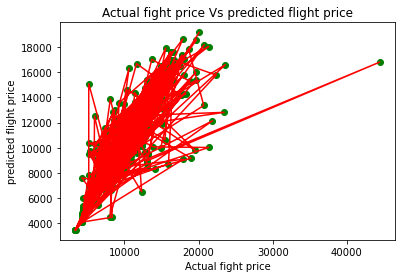

In [143]:
plt.scatter(y_test,final_pred,color='g')  # plot scatter of actual sales Vs predicted sales
plt.plot(y_test,final_pred,color='r') # here we plot line plot for actual sales vs predicted sales
plt.xlabel("Actual fight price") # x axis label is "Actual Sales"
plt.ylabel("predicted flight price")# y axis label is "predicted sales"
plt.title('Actual fight price Vs predicted flight price') # Titel is given
plt.show()  # display graph

# Model Saving

In [144]:
import joblib
joblib.dump(Final_RFR,"flight Price Prediction.pkl")

['flight Price Prediction.pkl']